<a href="https://colab.research.google.com/github/lsmanoel/Keras_DeepLearning_BreastCancerDiagnosis/blob/master/DlibAndOpenCV-FaceDetection/68_face_landmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detection of Landmarks Face to Face Recognition
The Landmarks Face are dots that indicate important features of human face. As will be shown in this exemple, Dlib algorirthm will be able to recognize a persons with 68 dots of landmarks face extracted.
In addition to recognizing people, this approach is capable of identifying facial poses like:


*  Face Morphing
*  Eye blink
*  Drowsiness level of a driver

The steps this process involve some different algorithm like HOG, SVN, CNN and KNN:

![alt text](https://raw.githubusercontent.com/lsmanoel/pythonLearningAndDeepLearning/master/DlibAndOpenCV-FaceDetection/resources/stepToFaceRecognition.svg.png)


To mount your google drive in colab Files workspace:

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

To install the packages in colaboratory workspace:

In [0]:
!apt update
!apt install -y cmake
!pip install dlib

# Exemple of landmarks detection:

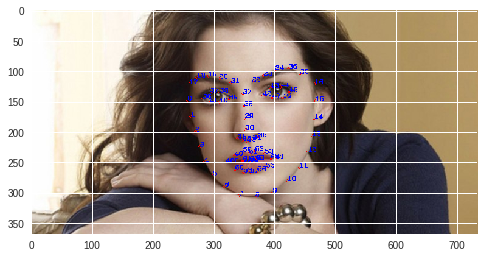

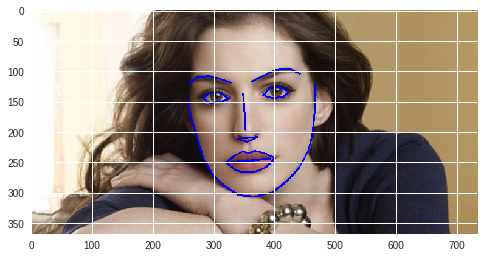

In [62]:
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt

def printLandmarks(frame, landmarks):
  for dot in landmarks.parts():
    cv2.circle(frame, (dot.x, dot.y), 2, (0, 0, 255), 1)

def printLandmarkNumber(frame, landmarks):
  for i, dot in enumerate(landmarks.parts()):
    cv2.putText(frame, str(i), (dot.x, dot.y), font, 0.55, (255, 0, 0), 1)

def printLandmarkLine(frame, landmarks):
  dots68 = [[0, 16, False], #chin line
           [17, 21, False],#right eyebrow
           [22, 26, False],#left eyebrow
           [27, 30, False],#nasal bridge
           [31, 35, True], #lower nose
           [36, 41, True], #left eye
           [42, 47, True], #right eye
           [48, 59, True], #outer lip
           [60, 67, True]]#inner lip
  for j in range(len(dots68)):
    landmarkArray = []
    for i in range(dots68[j][0], dots68[j][1]+1):      
      landmark = [landmarks.part(i).x, landmarks.part(i).y]
      landmarkArray.append(landmark)
      
    landmarkArray = np.array(landmarkArray, dtype=np.int32)
    cv2.polylines(frame, [landmarkArray], dots68[j][2], (255, 0, 0), 2)
    
  
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
frame1 = cv2.imread("gdrive/My Drive/Colab Notebooks/face_detection/photos/faceDataset_1/Anne_Hathaway/Anne_Hathaway_face_12.jpg")
np.copyto(frame2, frame1)

faceDetector = dlib.get_frontal_face_detector()
landmarkDetector = dlib.shape_predictor("gdrive/My Drive/Colab Notebooks/face_detection/resources/shape_predictor_68_face_landmarks.dat")

detectedFaces = faceDetector(frame1, 2)

for face in detectedFaces:
  landmarks = landmarkDetector(frame1, face)
  printLandmarks(frame1, landmarks)
  printLandmarkNumber(frame1, landmarks)
  
frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
plt.imshow(frame1)
plt.show()

for face in detectedFaces:
  landmarks = landmarkDetector(frame2, face)
  printLandmarkLine(frame2, landmarks)
  
frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
plt.imshow(frame2)
plt.show()

# Exemple of how to fit  the face descriptor:

In [80]:
import os
import glob
import _pickle as cPickle
import dlib
import cv2
import numpy as np

faceDetector = dlib.get_frontal_face_detector()
landmarkDetector = dlib.shape_predictor("gdrive/My Drive/Colab Notebooks/face_detection/resources/shape_predictor_68_face_landmarks.dat")

faceRecognizer = dlib.face_recognition_model_v1("gdrive/My Drive/Colab Notebooks/face_detection/resources/dlib_face_recognition_resnet_model_v1.dat")

index = {}
idx = 0
AllFaceDescriptors = None

n_detectedFaces = 0
for file in glob.glob(os.path.join("gdrive/My Drive/Colab Notebooks/face_detection/photos/faceDataset_1/Anne_Hathaway", "*.jpg")):
  frame = cv2.imread(file)
  detectedFaces = faceDetector(frame, 2)
  if len(detectedFaces) == 0:
    print("No face detected in file: ", file)
  else:    
    n_detectedFaces = n_detectedFaces + len(detectedFaces)
    for face in detectedFaces:
      landmarks = landmarkDetector(frame, face)
      faceDescriptor = faceRecognizer.compute_face_descriptor(frame, landmarks)
      
      faceDescriptorList = [fd for fd in faceDescriptor]
      faceDescriptorNpArray = np.asarray(faceDescriptorList, dtype=np.float64)
      faceDescriptorNpArray = faceDescriptorNpArray[np.newaxis, :]
      
      if AllFaceDescriptors is None:
          AllFaceDescriptors = faceDescriptorNpArray
      else:
          AllFaceDescriptors = np.concatenate((AllFaceDescriptors, faceDescriptorNpArray), axis=0)

      index[idx]=file
      idx += 1

print("Size: {} Shape: {}".format(len(AllFaceDescriptors), AllFaceDescriptors.shape))   
print("Number of detected faces: ", n_detectedFaces)


np.save("gdrive/My Drive/Colab Notebooks/face_detection/resources/faceDescriptors_rn_anne_hathaway.npy", AllFaceDescriptors)
with open("gdrive/My Drive/Colab Notebooks/face_detection/resources/indix_rn_anne_hathaway.pickle", 'wb') as fileIndex:
    cPickle.dump(index, fileIndex)

No face detected in file:  gdrive/My Drive/Colab Notebooks/face_detection/photos/faceDataset_1/Anne_Hathaway/Anne_Hathaway_face_14.jpg
Size: 49 Shape: (49, 128)
Number of detected faces:  49


# Exemple of using the trained face descriptor with KNN:

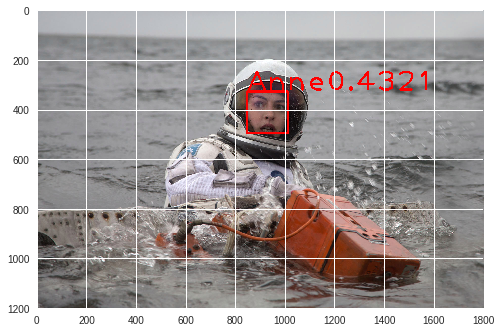

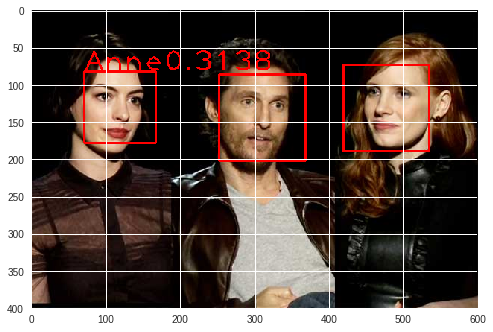

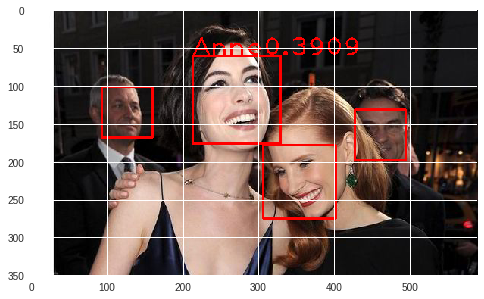

In [17]:
import os
import glob
import _pickle as cPickle
import dlib
import cv2
import numpy as np
from matplotlib import pyplot as plt

faceDetector = dlib.get_frontal_face_detector()
landmarkDetector = dlib.shape_predictor("gdrive/My Drive/Colab Notebooks/face_detection/resources/shape_predictor_68_face_landmarks.dat")

faceRecognizer = dlib.face_recognition_model_v1("gdrive/My Drive/Colab Notebooks/face_detection/resources/dlib_face_recognition_resnet_model_v1.dat")

index = np.load("gdrive/My Drive/Colab Notebooks/face_detection/resources/indix_rn_anne_hathaway.pickle")
AllFaceDescriptors = np.load("gdrive/My Drive/Colab Notebooks/face_detection/resources/faceDescriptors_rn_anne_hathaway.npy")

threshold = 0.5
n_detectedFaces = 0
for file in glob.glob(os.path.join("gdrive/My Drive/Colab Notebooks/face_detection/photos/faceDataset_1/interstellar_scenes", "*.jpg")):
  frame = cv2.imread(file)
  #-------------------------------------------------------------------------
  #HOG STEP:
  detectedFaces = faceDetector(frame, 3)
  
  if len(detectedFaces) == 0:
    print("No face detected in file: ", file)
  else:    
    n_detectedFaces = n_detectedFaces + len(detectedFaces)
    for face in detectedFaces:
      left, top, right, bottom = (int(face.left()), int(face.top()), int(face.right()), int(face.bottom()))
      cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), int(frame.shape[0]/150))
      
      landmark = landmarkDetector(frame, face)
      
      #-------------------------------------------------------------------------
      #CNN STEP:
      faceDescriptor = faceRecognizer.compute_face_descriptor(frame, landmark)
      faceDescriptorList = [fd for fd in faceDescriptor]
      faceDescriptorNpArray = np.asarray(faceDescriptorList, dtype=np.float64)
      
      faceDescriptorNpArray = faceDescriptorNpArray[np.newaxis, :]
      
      #-------------------------------------------------------------------------
      #KNN STEP:
      #Euclidean distance:
      distance = np.linalg.norm(faceDescriptorNpArray-AllFaceDescriptors, axis=1)
      minimalDistance_idx = np.argmin(distance)
      minimalDistance = distance[minimalDistance_idx] 
      
      if minimalDistance <= threshold:
        faceName = os.path.split(index[minimalDistance_idx])[1].split("_")[0]
        text = "{}{:.4f}".format(faceName, minimalDistance)
      else:
        text = ' '
      
      cv2.putText(frame, text, (left, top), cv2.FONT_HERSHEY_PLAIN, frame.shape[0]/150, (0, 0, 255), int(frame.shape[0]/150))
      
      
#     scale_percent = 200 # percent of original size
#     widthResize = int(frame.shape[1] * scale_percent / 100)
#     heightResize = int(frame.shape[0] * scale_percent / 100)
#     dim = (widthResize, heightResize) 
#     frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA) 

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)
    plt.show()

  